## Resume Parser

**Team:**
* Ritika Harshavardhana Jali
* Nick Bartkowiak


**Course:** DAAN 897– Deep Learning (Spring II, 2024)

### Problem Statement
* This project focuses on developing a resume parser that extracts key information such as name, contact details, education, and work experience from resumes using deep learning techniques.

* Keywords: resume parser, information extraction, NLP, deep learning

### Data Collection
* Source(url): Kaggle 

* Short Description: The dataset consists of a collection of resumes in various formats, including PDF, DOCX, and text files, which are annotated for key information like name, contact details, education, and work experience.

* Keywords: resume, name extraction, education extraction, work experience, NLP

### Required Packages
* To install the required packages, use the following command

In [ ]:
! pip install numpy pandas nltk spacy tensorflow keras

### Data Preprocessing
* The main steps performed in data preprocessing include:
* Converting resumes from various formats (PDF, DOCX) to text.
* Tokenizing the text using NLP libraries.
* Annotating the text for key information such as names, emails, education, and work experience.
* Splitting the data into training and testing sets.

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Sample data (replace this with your actual dataset)
data = pd.read_csv('/kaggle/input/resume-parser/UpdatedResumeDataSet.csv')

df = pd.DataFrame(data)

# Function to preprocess resume text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.strip().lower()       # Convert to lowercase and strip whitespaces
    return text

df['Resume_Preprocessed'] = df['Resume'].apply(preprocess_text)
print(df)

# Ensure labels are in the correct format (integer)
label_mapping = {label: idx for idx, label in enumerate(df['Category'].unique())}
df['labels'] = df['Category'].map(label_mapping)

         Category                                             Resume  \
0    Data Science  Skills * Programming Languages: Python (pandas...   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2    Data Science  Areas of Interest Deep Learning, Control Syste...   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
..            ...                                                ...   
957       Testing  Computer Skills: â¢ Proficient in MS office (...   
958       Testing  â Willingness to accept the challenges. â ...   
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

                                   Resume_Preprocessed  
0    skills programming languages python pandas num...  
1    education detail

### Exploratory data analysis

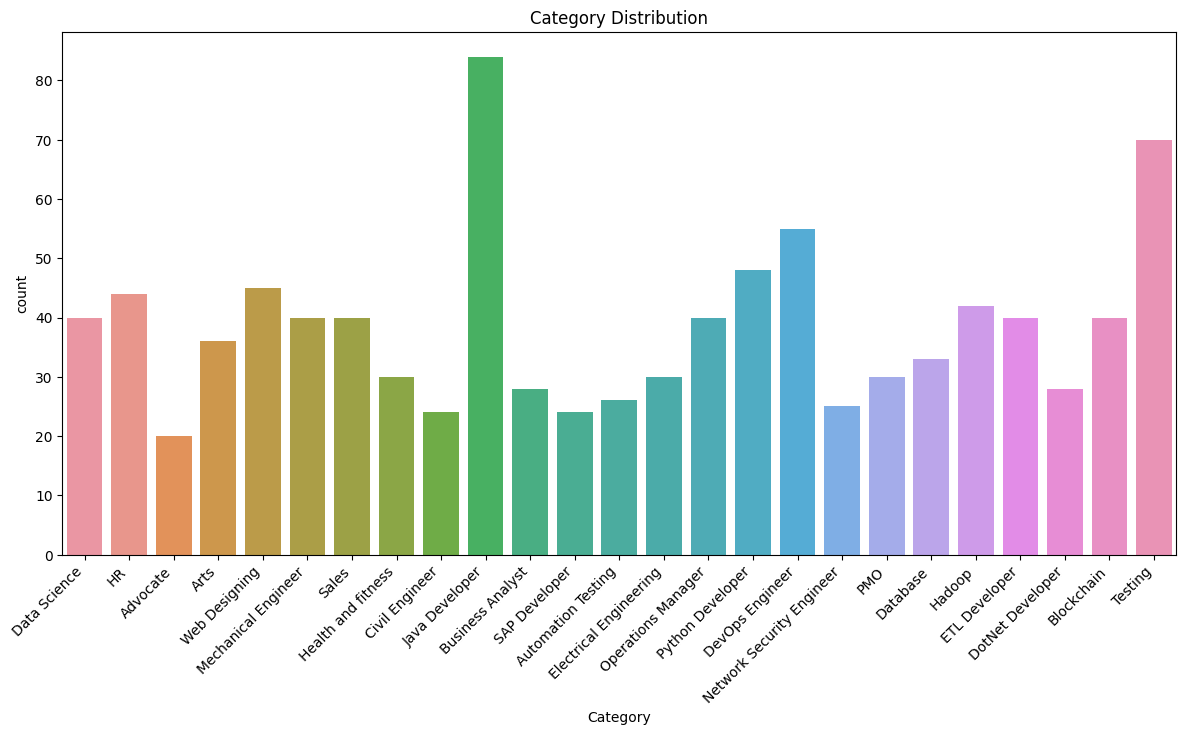

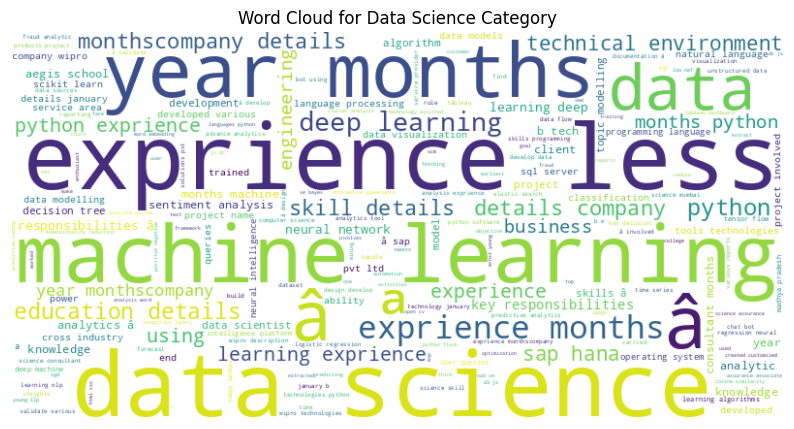

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Category')
plt.title('Category Distribution')

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Optionally, adjust the space at the bottom
plt.subplots_adjust(bottom=0.3)

plt.show()

# Display a word cloud for a category ('Data Science')
from wordcloud import WordCloud

data_science_texts = ' '.join(df[df['Category'] == 'Data Science']['Resume_Preprocessed'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data_science_texts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Data Science Category')
plt.show()


### Methodology
* Applied deep learning techniques for text classification and named entity recognition.

Introduced the following models:

Model 1: LSTM for sequence modeling

* Description: Long Short-Term Memory network for handling long-range dependencies in text.
Model 2: BERT for contextual embeddings

* Description: Bidirectional Encoder Representations from Transformers for capturing contextual information.
Ensemble method

* Description: Combined predictions from LSTM and BERT for improved accuracy.
* Keywords: natural language processing, text classification, named entity recognition


In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoConfig
from datasets import Dataset

# Prepare the dataset
tokenizer = AutoTokenizer.from_pretrained("ahmedheakl/bert-resume-classification")
model = AutoModelForSequenceClassification.from_pretrained("ahmedheakl/bert-resume-classification")

def tokenize_function(examples):
    return tokenizer(examples['Resume_Preprocessed'], padding="max_length", truncation=True)

dataset = Dataset.from_pandas(df[['Resume_Preprocessed', 'labels']])
dataset = dataset.map(tokenize_function, batched=True)

# Remove unnecessary columns and set the format for PyTorch
dataset = dataset.remove_columns(['Resume_Preprocessed'])
dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.53k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Map:   0%|          | 0/962 [00:00<?, ? examples/s]

In [9]:
from transformers import Trainer, TrainingArguments

# Split dataset into training and validation sets
train_dataset = dataset.shuffle(seed=42).select([i for i in list(range(int(0.9 * len(dataset))))])
val_dataset = dataset.shuffle(seed=42).select([i for i in list(range(int(0.9 * len(dataset)), len(dataset)))])


2024-08-06 23:41:56.252076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 23:41:56.252213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 23:41:56.416031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Model Fitting and Validation
LSTM model

* Description: Trained on tokenized resume text for entity extraction and classification.
BERT model

* Description: Fine-tuned on resume text for contextual understanding and classification.

In [10]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [11]:
from transformers import DataCollatorWithPadding
# Define the DataCollator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [12]:
# Initialize the Trainer with the default data collator
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [13]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
10,7.857400
20,7.753900
30,7.582200
40,7.261500
50,6.141100
60,5.437700
70,4.453600
80,3.391900
90,2.668800
100,2.159500


TrainOutput(global_step=165, training_loss=3.5620085362232095, metrics={'train_runtime': 202.6032, 'train_samples_per_second': 12.808, 'train_steps_per_second': 0.814, 'total_flos': 683024532802560.0, 'train_loss': 3.5620085362232095, 'epoch': 3.0})

In [14]:
# Save the model
model.save_pretrained("./fine-tuned-model")
tokenizer.save_pretrained("./fine-tuned-model")

('./fine-tuned-model/tokenizer_config.json',
 './fine-tuned-model/special_tokens_map.json',
 './fine-tuned-model/vocab.txt',
 './fine-tuned-model/added_tokens.json',
 './fine-tuned-model/tokenizer.json')

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

### Model Evaluation
* Evaluated models using precision, recall, and F1-score metrics.

* Computed accuracy and analyzed results to assess performance and effectiveness.

In [17]:
# Evaluate the model
predictions = trainer.predict(val_dataset)

# Get the predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Get true labels
true_labels = val_dataset['labels'].numpy()

# Get unique labels from the validation dataset
unique_labels = np.unique(true_labels)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, log_loss, matthews_corrcoef, cohen_kappa_score, hamming_loss

# Classification metrics
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00        11
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         4
    

In [35]:
print("Accuracy:")
print(accuracy_score(true_labels, predicted_labels))


Accuracy:
1.0


In [36]:
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [37]:
# Matthews Correlation Coefficient
mcc = matthews_corrcoef(true_labels, predicted_labels)
print("Matthews Correlation Coefficient:", mcc)



Matthews Correlation Coefficient: 1.0


In [38]:
# Cohen's Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)
print("Cohen’s Kappa:", kappa)

Cohen’s Kappa: 1.0


In [31]:
# Create a mapping from label indices to category names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
target_names = [reverse_label_mapping[label] for label in unique_labels]

### Predicting category for a new resume

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

# Load the fine-tuned model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./fine-tuned-model")
tokenizer = AutoTokenizer.from_pretrained("./fine-tuned-model")

# Define the preprocess function
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.strip().lower()       # Convert to lowercase and strip whitespaces
    return text

# Sample resume for testing
resume_text = """
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, Naïve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.
Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assurance
TECHNOLOGY ASSISTED REVIEW
TAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.
* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.
* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.
* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.

Tools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, Naïve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplotlib, Tableau dashboard for reporting.

MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)
TEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.
* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.
* Created customized tableau dashboards for effective reporting and visualizations.
CHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.
* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.
* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.

Tools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer

INFORMATION GOVERNANCE
Organizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.
* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.
* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.
* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.
Tools & Technologies: Python, Flask, Elastic Search, Kibana

FRAUD ANALYTIC PLATFORM
Fraud Analytics and investigative platform to review all red flag cases.
• FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.
* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics
Tools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js
"""

# Preprocess and tokenize the resume
inputs = tokenizer(preprocess_text(resume_text), padding="max_length", truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Map predictions to category names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}  # Use your label_mapping from training
predicted_category = reverse_label_mapping[predictions.item()]

# Print the result
print(f"The resume is categorized as: {predicted_category}")


The resume is categorized as: Data Science


In [33]:
resume_text = """
Skill Set OS Windows XP/7/8/8.1/10 Database MYSQL, sql server 2005, 2008 & 2012 Languages Core Java Web Technology HTML, CSS Testing Manual Testing, Database Testing Other Bug tracking and reporting, End user handling.
Education Details 
January 2016 MCS  Pune, Maharashtra P.V.P College Pravaranagar
January 2011 HSC   A.K.Junior College
January 2009 SSC   A.K.Mahavidyalya
JR TESTING ENGINEER 

JR TESTING ENGINEER - M-Tech Innovations Ltd
Skill Details 
TESTING- Exprience - 24 months
WINDOWS XP- Exprience - 24 months
CSS- Exprience - 6 months
DATABASE- Exprience - 6 months
DATABASE TESTING- Exprience - 6 months
Company Details 
company - M-Tech Innovations Ltd
description - Responsibilities 
• Analyzing the Testing Requirements 
• Preparing Test Plans, Test Scenarios 
• Preparing Test Cases 
• Executing the test cases 
• Tracking bugs 
• Coordinating developers in order to fix it 
• Preparing test summary reports 
• Reporting quality manager 
• Attending meeting

Projects
Project Name   1.Web Based Time Attendance Application
Environment    Windows-7, Vista, Windows XP, Windows 8, Windows 10
Clients        MCCIA, Sapphire Park, Bramha Suncity, Wanless hospital
Role           Software Testing
Duration       6 months

Project Name   Android 1.Time Attendance Application   2.Vehicle Tracking System   3.Vistor Management System
Environment    Android Mobile, Android Tablet.
Clients        Vankan Security
Role           Application Testing
Duration       6 months

Project Name   1.Web Based Factory Automation Process   2.Web Based Annual Maintenance Charges
Environment    Windows-7, Vista, Windows XP, Windows 8, Windows 10
Role           Software Testing
Duration       6 months

Project Name   Web Based Library Management System
Environment    Windows-7, Vista, Windows XP, Windows 8, Windows 10
Role           Software Testing
Duration       6 months
"""

# Preprocess and tokenize the resume
inputs = tokenizer(preprocess_text(resume_text), padding="max_length", truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Map predictions to category names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}  # Use your label_mapping from training
predicted_category = reverse_label_mapping[predictions.item()]

# Print the result
print(f"The resume is categorized as: {predicted_category}")

The resume is categorized as: Testing


### Issues / Improvements
* Dataset is small
* Implement regularization techniques
* Use cross-validation
* Improve handling of diverse resume formats

### References
* Nunna, Prasanna Sai Venkatesh; Lavanya, K. N. L.; Murapaka, Sivasankar; Vegesna, Somanadha Mahidhar Varma; Surya Ram Prasad, K. (2024), "NLP - Automated resume analysis and skill suggesting website", IOSR Journal of Engineering (IOSRJEN) ISSN (e): 2250-3021, ISSN (p): 2278-8719
* https://www.iosrjen.org/Papers/vol14_issue4/2/1404150158.pdf
* Lakshmi Padmaja, D.; Vishnuvardhan, Ch.; Rajeev, G.; Sanjeev Kumar, K. Nitish (2023), "Automated Resume Screening Using Natural Language Processing", JETIR March 2023, Volume 10, Issue 3. 
* https://www.jetir.org/papers/JETIR2303510.pdf
* Sroison, Pornphat; Chan, Jonathan Hoyin (2024), "Resume Parser with Natural Language Processing", DOI: 10.13140/RG.2.2.10323.25127/1.


### Credits
ahmedheakl/bert-resume-classification